In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('Churn_Modelling.csv')

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
x = df[['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts',
        'HasCrCard','IsActiveMember','EstimatedSalary']]

y = df['Exited']

In [19]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

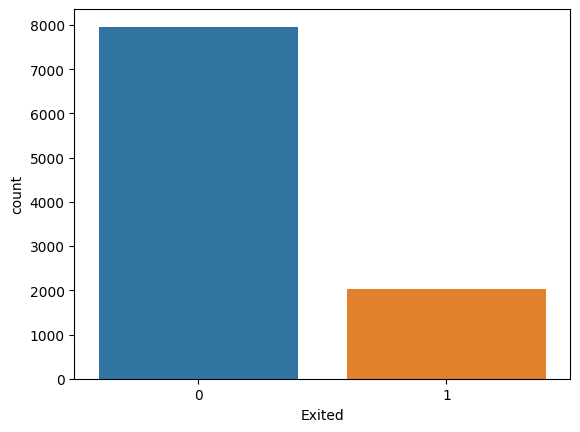

In [20]:
sns.countplot(x=y)

In [21]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [24]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, train_size=0.25)

In [27]:
x.shape

(10000, 8)

In [28]:
x_test.shape

(7500, 8)

In [29]:
x_train.shape

(2500, 8)

In [36]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(100,100,100), random_state=0,
                    max_iter=100, activation='relu')

In [37]:
ann.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [38]:
y_pred = ann.predict(x_test)

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

accuracy_score(y_test, y_pred)

0.8132

In [44]:
y_test.value_counts()

0    5969
1    1531
Name: Exited, dtype: int64

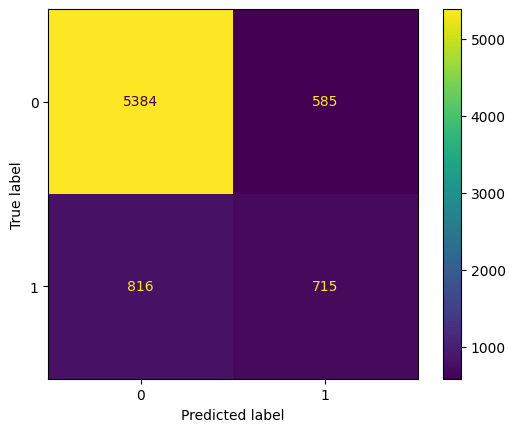

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      5969
           1       0.55      0.47      0.51      1531

    accuracy                           0.81      7500
   macro avg       0.71      0.68      0.69      7500
weighted avg       0.80      0.81      0.81      7500



Less Recall for class '1' means we need to do point of improvement to increase class 1 pred

By balancing

Random oversampler: matching max entries class

Random undersampler: matching min entries class

In [46]:
!pip install imbalanced-learn

In [48]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 0)

x_res, y_res = ros.fit_resample(x,y)

y_res.value_counts()

# Scaling and performing recurring task then

1    7963
0    7963
Name: Exited, dtype: int64